#                                           EV Market Segmenation

Name - Varun Kumar Jetty

Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
678,Honda Jazz VX,2018,600000,20000,Petrol,Individual,Manual,First Owner
1161,Maruti Swift ZDI Plus,2015,484999,73000,Diesel,Dealer,Manual,Second Owner
2398,Maruti Alto LXi,2007,90000,100000,Petrol,Individual,Manual,Second Owner
4052,Hyundai Creta 1.6 CRDi SX,2016,1151000,85000,Diesel,Individual,Manual,First Owner
1265,Chevrolet Beat Diesel LS,2013,190000,70000,Diesel,Individual,Manual,First Owner
1371,Maruti Swift Dzire ZDI,2019,475000,120000,Diesel,Individual,Manual,Second Owner
801,Maruti Wagon R LXI,2009,180000,30375,Petrol,Dealer,Manual,First Owner
1176,Renault KWID 1.0 RXT Optional,2017,350000,10000,Petrol,Individual,Manual,First Owner
1268,Toyota Corolla Executive (HE),2009,300000,23262,Petrol,Dealer,Manual,First Owner
127,Toyota Innova 2.5 GX (Diesel) 8 Seater,2012,500000,100000,Diesel,Individual,Manual,First Owner


# Exploratory Data Analysis

An Exploratory Data Analysis, or EDA is a thorough examination meant to uncover the
underlying structure of a data set and is important for a company because it exposes
trends, patterns, and relationships that are not readily apparent.

In [4]:
df.shape

(4340, 8)

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [9]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [10]:
electric_cars = df[df['fuel'] == 'Electric']
print(electric_cars)


                     name  year  selling_price  km_driven      fuel  \
4145  Toyota Camry Hybrid  2006         310000      62000  Electric   

     seller_type transmission         owner  
4145      Dealer    Automatic  Second Owner  


In [11]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [12]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [14]:
df.name.unique

<bound method Series.unique of 0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object>

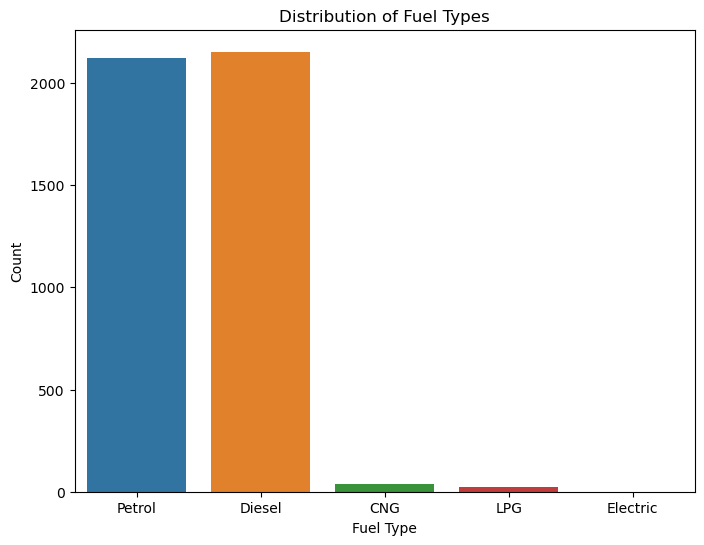

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

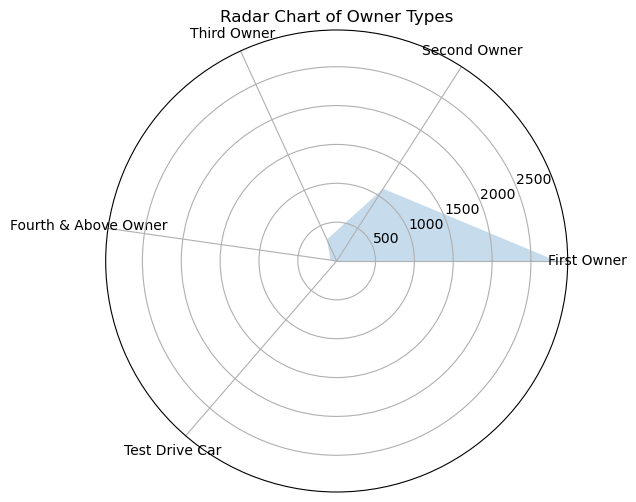

In [16]:
plt.figure(figsize=(8, 6))
owner_counts = df['owner'].value_counts().reset_index()
owner_counts.columns = ['Owner', 'Count']
categories = owner_counts['Owner']
values = owner_counts['Count']
plt.polar()
plt.fill(categories.tolist() + [categories[0]], values.tolist() + [values[0]], alpha=0.25)
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.title('Radar Chart of Owner Types')
plt.show()

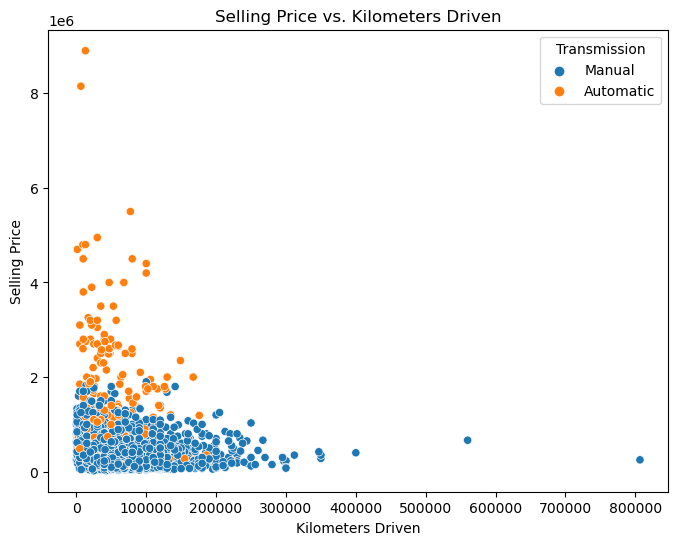

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='transmission')
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(title='Transmission')
plt.show()

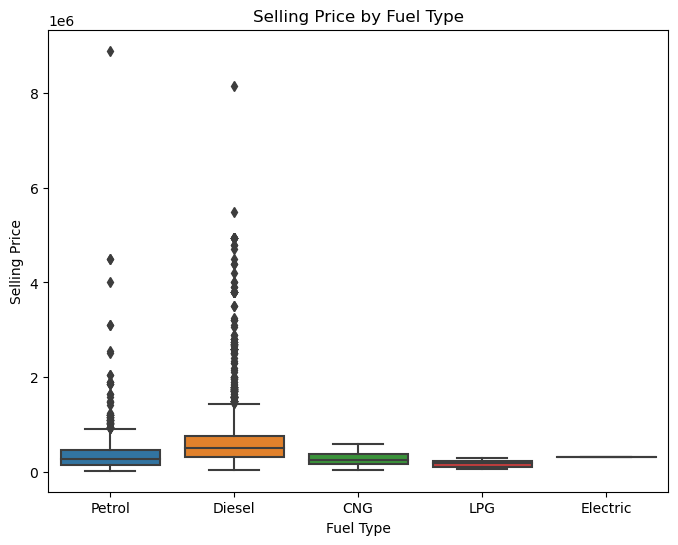

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

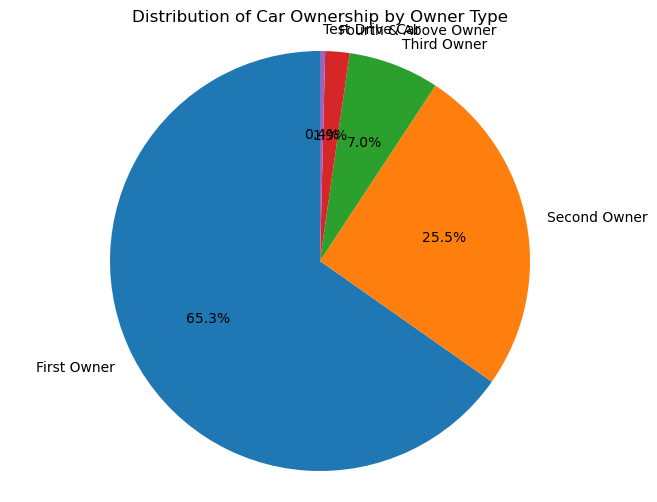

In [19]:
plt.figure(figsize=(8, 6))
owner_counts = df['owner'].value_counts()
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Car Ownership by Owner Type')
plt.axis('equal')
plt.show()

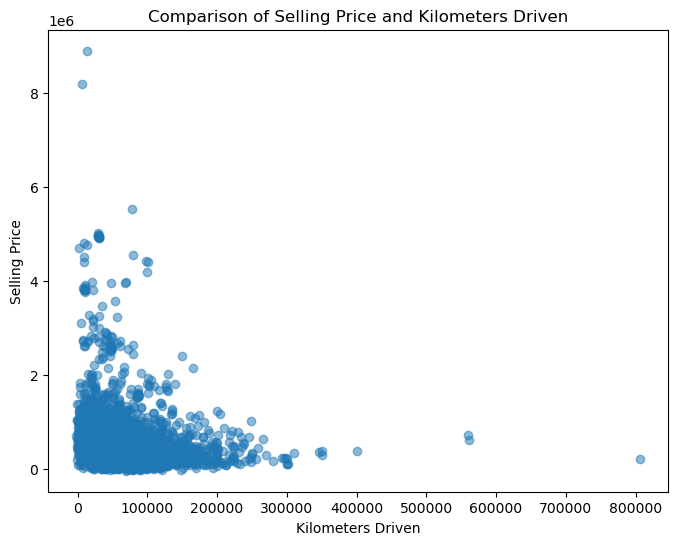

In [20]:
jittered_km_driven = df['km_driven'] + np.random.normal(0, 1000, len(df))
jittered_selling_price = df['selling_price'] + np.random.normal(0, 50000, len(df))

plt.figure(figsize=(8, 6))
plt.scatter(jittered_km_driven, jittered_selling_price, alpha=0.5)
plt.title('Comparison of Selling Price and Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

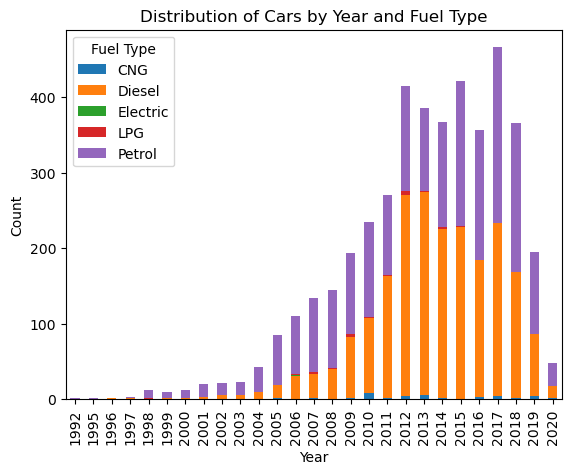

In [21]:
grouped_data = df.groupby(['year', 'fuel']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Distribution of Cars by Year and Fuel Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.show()

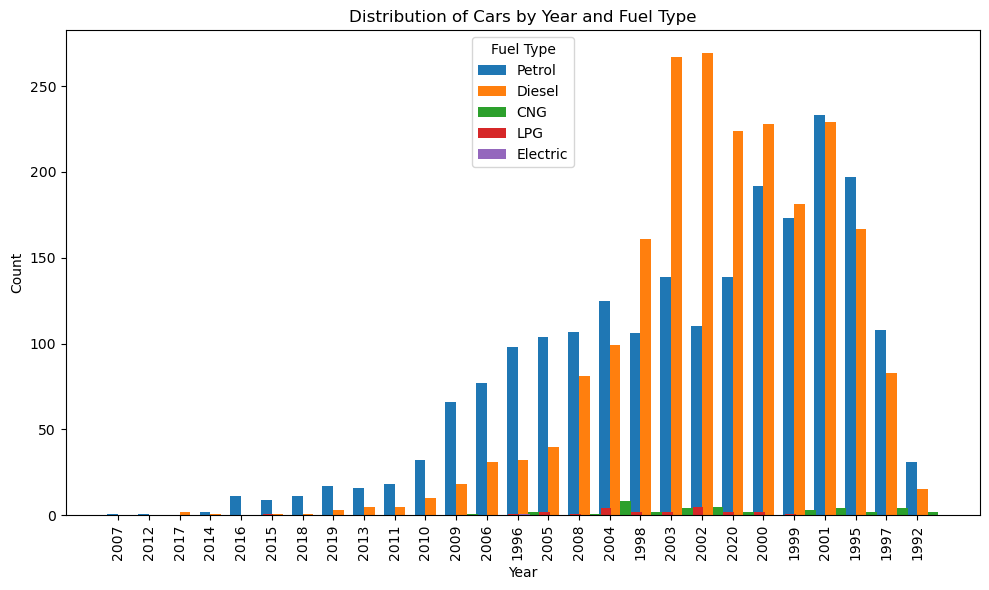

In [22]:
grouped_data = df.groupby(['year', 'fuel']).size().unstack()

fuel_types = df['fuel'].unique()
years = df['year'].unique()

bar_width = 0.35

index = np.arange(len(years))

plt.figure(figsize=(10, 6))
for i, fuel_type in enumerate(fuel_types):
    plt.bar(index + (i * bar_width), grouped_data[fuel_type], bar_width, label=fuel_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Cars by Year and Fuel Type')
plt.xticks(index + bar_width / 2, years, rotation='vertical')
plt.legend(title='Fuel Type')
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()

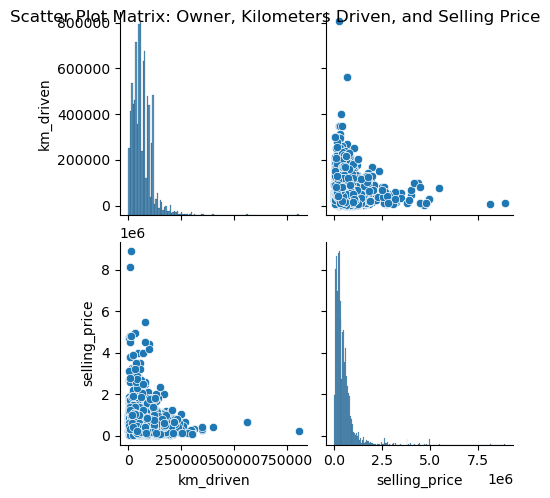

In [23]:
cols_of_interest = ['owner', 'km_driven', 'selling_price']

sns.pairplot(df[cols_of_interest])
plt.suptitle('Scatter Plot Matrix: Owner, Kilometers Driven, and Selling Price')
plt.show()

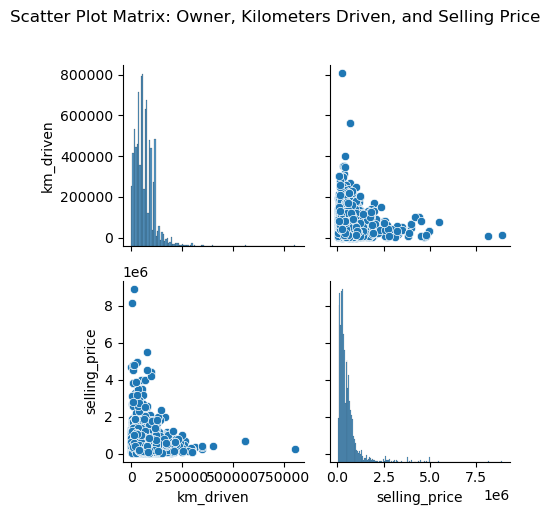

In [24]:
cols_of_interest = ['owner', 'km_driven', 'selling_price']

sns.pairplot(df[cols_of_interest])
plt.suptitle('Scatter Plot Matrix: Owner, Kilometers Driven, and Selling Price', y=1.02)
plt.tight_layout()
plt.show()

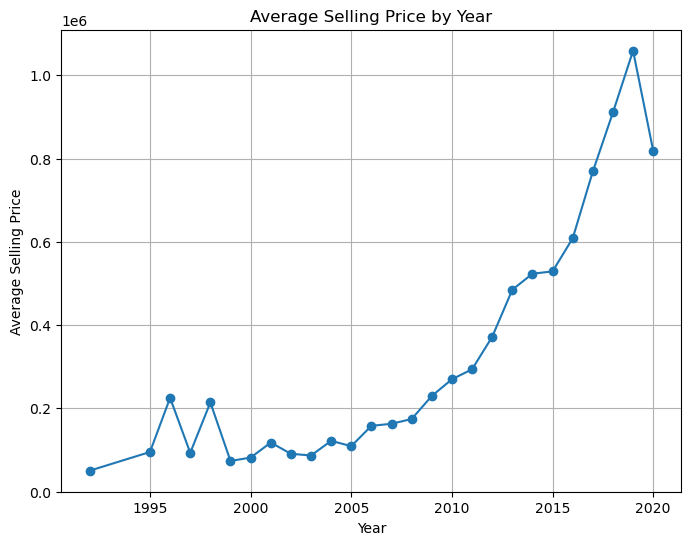

In [25]:
average_price_by_year = df.groupby('year')['selling_price'].mean()

plt.figure(figsize=(8, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

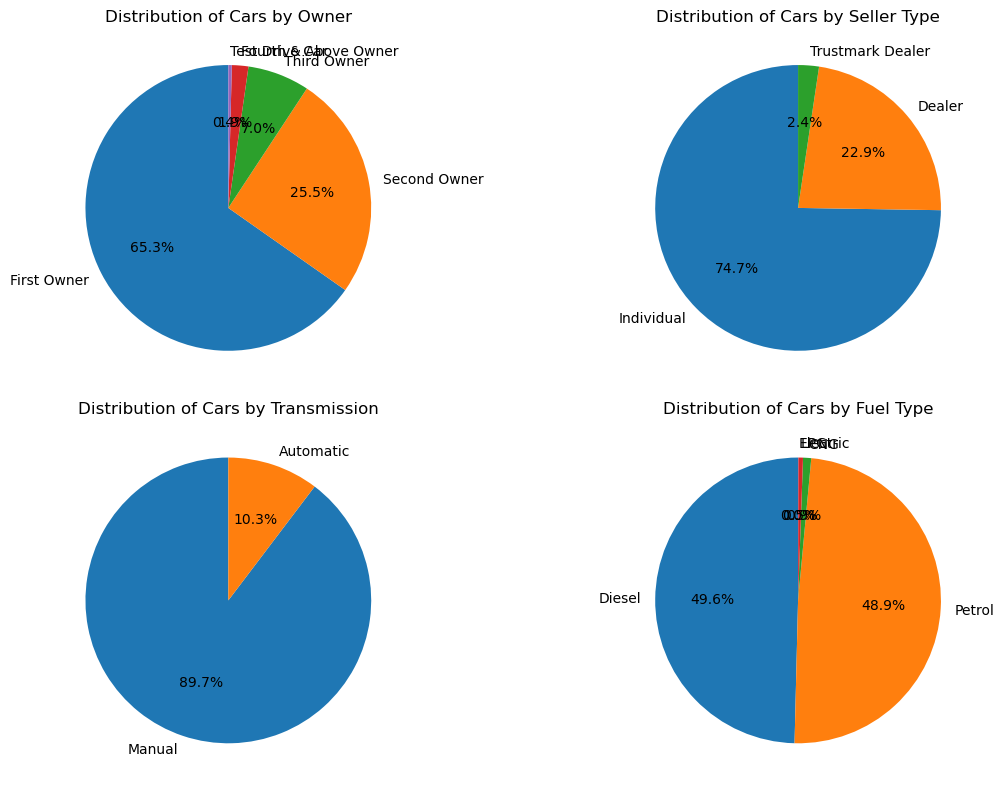

In [26]:
owner_counts = df['owner'].value_counts()
seller_type_counts = df['seller_type'].value_counts()
transmission_counts = df['transmission'].value_counts()
fuel_type_counts = df['fuel'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of Cars by Owner')

axes[0, 1].pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution of Cars by Seller Type')

axes[1, 0].pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of Cars by Transmission')

axes[1, 1].pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribution of Cars by Fuel Type')

plt.tight_layout()

plt.show()

In [27]:
label_encoder = LabelEncoder()

In [28]:
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [30]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276
std,4.215344,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_10480\460784327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


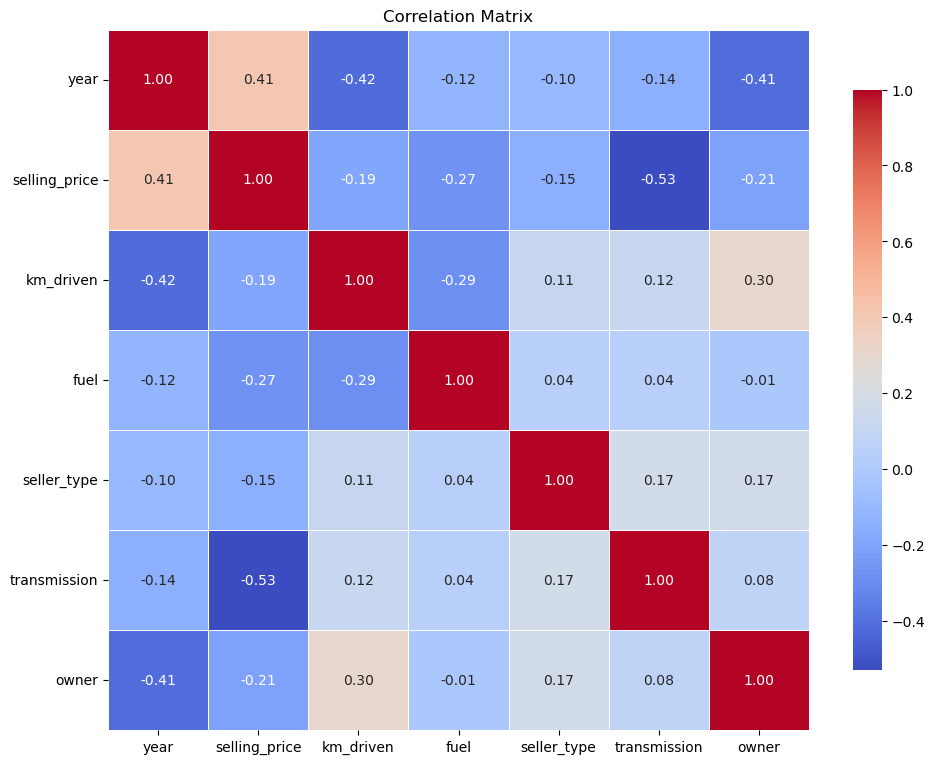

In [31]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f',
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix')

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Market Segmentation

Segment Extraction

K means is one of the most popular Unsupervised Machine Learning Algorithms Used
for Solving Classification Problems. K Means segregates the unlabeled data into
various groups, called clusters, based on having similar features, common patterns.
Suppose we have N number of Unlabeled Multivariate Datasets of various features like
water-availability, price, city etc. from our dataset. The technique to segregate Datasets
into various groups, on the basis of having similar features and characteristics, is called
Clustering. The groups being Formed are known as Clusters. Clustering is being used
in Unsupervised Learning Algorithms in Machine Learning as it can segregate
multivariate data into various groups, without any supervisor, on the basis of a common
pattern hidden inside the datasets.
In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10.
For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS
is the sum of squared distance between each point and the centroid in a cluster. When
we plot the WCSS with the K value, the plot looks like an Elbow.

As the number of clusters increases, the
WCSS value will start to decrease. WCSS
value is largest when K = 1. When we analyze
the graph we can see that the graph will
rapidly change at a point and thus creating an
elbow shape. From this point, the graph starts
to move almost parallel to the X-axis. The K
value corresponding to this point is the
optimal K value or an optimal number of
clusters.

K-Means

In [32]:
features = ['year', 'selling_price', 'km_driven']

subset_df = df[features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(subset_df)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

cluster_labels = kmeans.labels_

df['cluster'] = cluster_labels

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} Center: {center}")

cluster_counts = df['cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center: [  2015.78224456 579554.47822446  42665.40075377]
Cluster 2 Center: [2.01698947e+03 3.48434737e+06 3.66715684e+04]
Cluster 3 Center: [  2009.43026387 254670.6725902   98011.68443726]

Cluster Counts:
0    2388
2    1857
1      95
Name: cluster, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_10480\4293902767.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['year'], cluster_data['selling_price'], label=f'Cluster {cluster_label}', cmap='viridis')
C:\Users\admin\AppData\Local\Temp\ipykernel_10480\4293902767.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['year'], cluster_data['km_driven'], label=f'Cluster {cluster_label}', cmap='viridis')


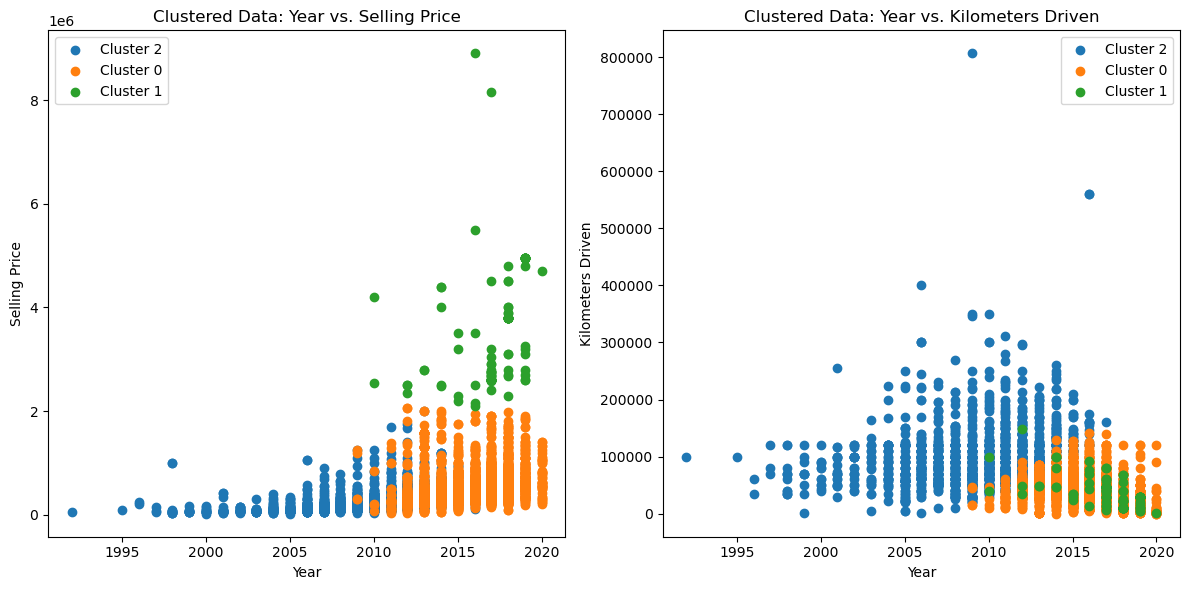

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['year'], cluster_data['selling_price'], label=f'Cluster {cluster_label}', cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Clustered Data: Year vs. Selling Price')
plt.legend()

plt.subplot(1, 2, 2)
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['year'], cluster_data['km_driven'], label=f'Cluster {cluster_label}', cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.title('Clustered Data: Year vs. Kilometers Driven')
plt.legend()

plt.tight_layout()
plt.show()

Based on the K-means clustering results, the dataset has been divided into three clusters (Cluster 1, Cluster 2, and Cluster 3).

Cluster 1:

Center: [2015, 579,554.48, 42,665.40]
Cluster Count: 2,388
In Cluster 1, the average values for the features are as follows:

Year: Around 2015
Selling Price: Around 579,554.48
Kilometers Driven: Around 42,665.40
This cluster contains the highest number of data points (2,388). Vehicles in this cluster tend to be relatively newer (around 2015), have a moderately high selling price (around 579,554.48), and have lower kilometers driven (around 42,665.40).

Cluster 2:

Center: [2016, 3,484,347.37, 36,671.57]
Cluster Count: 95
In Cluster 2, the average values for the features are as follows:

Year: Around 2016
Selling Price: Around 3,484,347.37
Kilometers Driven: Around 36,671.57
This cluster contains a relatively small number of data points (95). Vehicles in this cluster are typically newer (around 2016), have a significantly higher selling price (around 3,484,347.37), and have relatively lower kilometers driven (around 36,671.57).

Cluster 3:

Center: [2009, 254,670.67, 98,011.68]
Cluster Count: 1,857
In Cluster 3, the average values for the features are as follows:

Year: Around 2009
Selling Price: Around 254,670.67
Kilometers Driven: Around 98,011.68
This cluster contains a moderate number of data points (1,857). Vehicles in this cluster tend to be older (around 2009), have a lower selling price (around 254,670.67), and have relatively higher kilometers driven (around 98,011.68).

# Summary

Based on the data and information analyzed, the market segmentation of Electric Vehicles (EVs) can be summarized as follows:

Fuel Type Distribution: Among the available fuel types, the dataset shows that EVs represent a very small portion, with only one record labeled as "Electric." EVs constitute a niche segment within the dataset.

Cluster Analysis: Through K-means clustering, the dataset was divided into three clusters:

Cluster 1: This cluster comprises the majority of data points (2,388) and represents vehicles that are relatively newer (around 2015), have a moderately high selling price (around 579,554.48), and lower kilometers driven (around 42,665.40).

Cluster 2: This cluster contains a small number of data points (95) and represents vehicles that are even newer (around 2016.99), have significantly higher selling prices (around 3,484,347.37), and relatively lower kilometers driven (around 36,671.57).

Cluster 3: This cluster includes a moderate number of data points (1,857) and represents vehicles that are older (around 2009.43), have lower selling prices (around 254,670.67), and relatively higher kilometers driven (around 98,011.68).

Market Share: Based on the clustering results, it appears that EVs are not dominant in the overall market segment. However, it's important to note that the dataset might not fully represent the EV market, as there is only one record labeled as "Electric." Therefore, further analysis with a larger and more representative dataset is recommended to gain a comprehensive understanding of the EV market segmentation.

We should bear in mind that this summary is based on the provided dataset and the clustering results. The actual market segmentation and trends may vary based on additional factors, such as geographic location, specific market dynamics, and the availability and adoption of EVs in different regions.